#### 무게를 찾기
- 목표 : 농어 길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋 : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight
- 학습-방법 : 지도학습 > 회귀
- 알고-리즘 : 선형회귀 >>> 데이터 분포가 선형의 형태

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
FILE = '../data/fish.csv'
fishdf = pd.read_csv(FILE, usecols=[0,1,2])
fishdf

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [134]:
fishdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [135]:
fishdf.value_counts()

Species    Weight  Length
Roach      160.0   22.5      2
Perch      120.0   22.0      2
Bream      600.0   32.0      2
           700.0   33.0      2
           242.0   25.4      1
                            ..
Perch      100.0   18.0      1
           110.0   21.0      1
                   22.0      1
           115.0   21.0      1
Whitefish  1000.0  40.0      1
Name: count, Length: 155, dtype: int64

In [136]:
fishdf['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [137]:
values = {'Bream':1, 'Roach':2, 'Whitefish':3, 'Parkki':4, 'Perch':5 , 'Pike':6, 'Smelt':7}
fishdf['Code']=fishdf['Species'].replace(values)

In [138]:
fishdf.value_counts()

Species    Weight  Length  Code
Roach      160.0   22.5    2       2
Perch      120.0   22.0    5       2
Bream      600.0   32.0    1       2
           700.0   33.0    1       2
           242.0   25.4    1       1
                                  ..
Perch      100.0   18.0    5       1
           110.0   21.0    5       1
                   22.0    5       1
           115.0   21.0    5       1
Whitefish  1000.0  40.0    3       1
Name: count, Length: 155, dtype: int64

In [139]:
mask = (fishdf['Species'] =='Bream') | (fishdf['Species'] == 'Smelt')
mask
two_fishdf=fishdf[mask]
two_fishdf
two_fishdf.corr(numeric_only=True)

,Weight,Length,Code
Weight,1.000000,0.960347,-0.843828
Length,0.960347,1.000000,-0.944132
Code,-0.843828,-0.944132,1.000000


In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
model = KNeighborsClassifier()

In [142]:
feature = two_fishdf[['Weight']]
target = two_fishdf['Length']
print(feature.shape)
print(target.shape)

(49, 1)
(49,)


In [143]:
model.fit(feature, target)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
print(model.classes_, model.feature_names_in_)

[1 7] ['Weight' 'Length']


In [ ]:
# 학습용과 테스트용 데이터셋 분리
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=11)

In [ ]:
print(f'{X_train.shape}, {X_train.ndim}')
print(f'{y_train.shape}, {y_train.ndim}')

print()

print(f'{X_test.shape}, {X_test.ndim}')
print(f'{y_test.shape}, {y_test.ndim}')

(36, 2), 2
(36,), 1

(13, 2), 2
(13,), 1


In [ ]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

In [ ]:
myscaler = MinMaxScaler()
myscaler.fit(X_train)
myscaler.min_, myscaler.data_min_, myscaler.scale_, myscaler.data_max_

(array([-0.00877635, -0.36666667]),
 array([ 8.7, 11. ]),
 array([0.00100878, 0.03333333]),
 array([1000.,   41.]))

In [ ]:
X_train.max(), X_train.min()
x_ts = myscaler.transform(X_train)
x_ts.shape

(36, 2)

In [ ]:
x_test_s = myscaler.transform(X_test)
x_test_s.shape, x_test_s.min(), x_test_s.max()

((13, 2), -0.03999999999999998, 0.9546050640572986)

In [ ]:
# 모델 생성 및 학습진행
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(feature, target)

LinearRegression()

In [ ]:
model.coef_ , model.intercept_

(array([ 0.00674955, -0.4600896 ]), 12.161882580596682)

In [ ]:
pre = model.coef_[0]*feature+model.intercept_
pre = pre.values.reshape(-1, 1)

In [ ]:
real = target.to_numpy()
print(real.shape)
print(pre.shape)

(49,)
(98, 1)


In [ ]:
# 평가
model.score(feature, target)

0.9422284256674678

In [ ]:
# 예측
predict1 = model.predict(feature)
predict1

array([ 2.10899738,  2.01889507,  2.26435457,  1.26937018,  1.72158993,
        1.53451818,  1.8719956 ,  0.99151838,  1.39649129,  1.411906  ,
        1.1051404 ,  1.27387912,  1.04383432, -0.26613825,  1.48874437,
        1.48874437,  1.70360962,  1.70360962,  0.86610545,  1.13608739,
        0.39982644,  1.14227678,  0.47351133,  0.64843944,  0.78343041,
        0.95216912,  0.91842138,  0.41783448,  1.33577308,  1.88811576,
        0.65801747,  0.89425167,  0.23167561, -0.12098137, -0.28972009,
        7.69822644,  7.38156335,  7.33217962,  7.16636756,  7.07502459,
        7.02159113,  6.80032074,  6.79964578,  6.70695291,  6.6311339 ,
        6.54721544,  6.26306222,  5.71556735,  5.39485453])

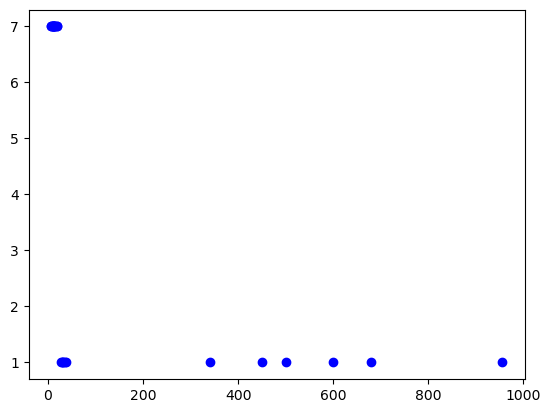

In [ ]:

plt.plot(X_test, y_test, 'bo')
plt.show()

In [ ]:
# 피쳐와 타겟 잘못잡음 ㅋㅋㅋㅋㅋㅋ